# CHOCOLAT MINI PROJECT

## 1 - Reading Dataset

#### Load flavors of cacao dataset

In [4]:
import pandas as pd
cacao_data = pd.read_csv('flavors_of_cacao.csv')
cacao_df = pd.DataFrame(cacao_data)

#### Checking for missing values

In [6]:
cacao_df.isna().sum()

Company \n(Maker-if known)           0
Specific Bean Origin\nor Bar Name    0
REF                                  0
Review\nDate                         0
Cocoa\nPercent                       0
Company\nLocation                    0
Rating                               0
Bean\nType                           1
Broad Bean\nOrigin                   1
dtype: int64

##### There is 1 missing value in "Bean Type" column and 1 missing value in "Broad Bean origin" column.

#### Deleting all missing value entries

In [9]:
#dataset without missing values will be stored in new dataframe "cacao_df1"
cacao_df1 = cacao_df.dropna()

## 2 - Exploring the Dataset

#### Number of tuples in dataset

In [13]:
cacao_df1.shape

(1793, 9)

##### Teere are 1793 tuples in the dataset

#### Number of companies in the dataset

In [16]:
len(cacao_df1['Company\xa0\n(Maker-if known)'].unique())

416

##### There are 416 companies in the dataset

#### Number of review made in 2013

In [19]:
sum(cacao_df1['Review\nDate'] == 2013)

184

##### There are 184 reviews made in 2013.

#### Missing value in Bean Type in the original dataset

In [22]:
cacao_df['Bean\nType'].isna().sum()

1

#### Missing value in Bean Type after dropping

In [24]:
cacao_df1['Bean\nType'].isna().sum()

0

## 3 - Visualization

#### Histogram of "Rating column"

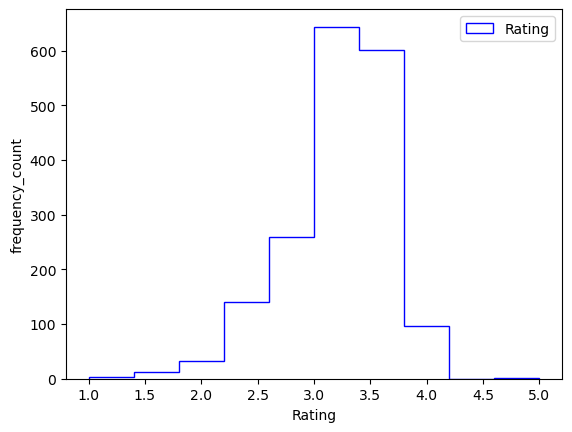

In [28]:
import matplotlib.pyplot as plt

plt.hist(cacao_df1['Rating'], label = 'Rating', color = 'b', histtype = 'step')
plt.xlabel('Rating')
plt.ylabel('frequency_count')
plt.legend(loc = 'upper right')
plt.show()

##### The "Rating" is slightly skewed left : 
######  * few "Rating" in the left half range [0, 2.5]
######  * majority of "Rating" lies in [2.5, 3.75]
##### Very few chocolat have the top "Rating" in range [4.5, 5]

#### Convert the Column Percent from string to float

In [31]:
cacao_df1['Cocoa\nPercent'] = cacao_df1['Cocoa\nPercent'].str[:-1].astype(float)

C:\Users\DELL\AppData\Local\Temp\ipykernel_6864\464420617.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacao_df1['Cocoa\nPercent'] = cacao_df1['Cocoa\nPercent'].str[:-1].astype(float)


In [32]:
cacao_df1['Cocoa\nPercent'].dtypes

dtype('float64')

#### Plot the converted numerical Cocoa Percent values against the Rating values

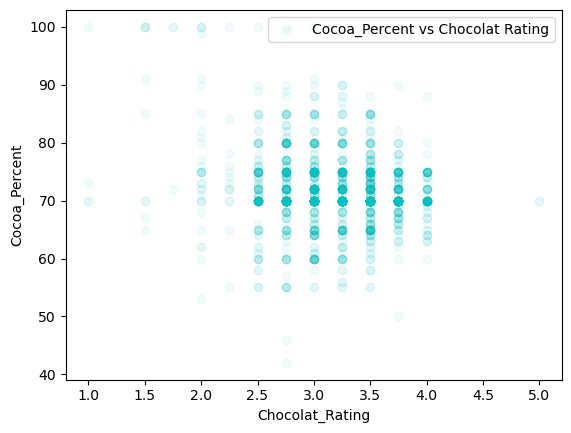

In [34]:
import numpy as np
y = cacao_df1['Cocoa\nPercent']
x = cacao_df1['Rating'] 
plt.scatter(x, y, label = 'Cocoa_Percent vs Chocolat Rating', color = 'c', alpha = 0.05)
plt.xlabel('Chocolat_Rating')
plt.ylabel('Cocoa_Percent')
plt.legend(loc = 'upper right')
plt.show()

##### There are few cocoa in a bar correspond to higher rating : around 70% of cocoa

## 4- Normalization

#### Normalize the Rating Column and print the results

In [39]:
mini = min(cacao_df1['Rating'])
maxi = max(cacao_df1['Rating'])
cacao_df1['Rating'] = (cacao_df1['Rating'] - mini)/(maxi - mini)
cacao_df1['Rating']

C:\Users\DELL\AppData\Local\Temp\ipykernel_6864\1901219348.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacao_df1['Rating'] = (cacao_df1['Rating'] - mini)/(maxi - mini)


0       0.6875
1       0.4375
2       0.5000
3       0.6250
4       0.6250
         ...  
1790    0.6875
1791    0.5000
1792    0.6250
1793    0.5625
1794    0.5000
Name: Rating, Length: 1793, dtype: float64

## 5 - List of companies ordered by their average score (averaged over each company’s reviews)

#### Companies with its normalized rating average 

In [42]:
company_average_rate = cacao_df1.groupby('Company\xa0\n(Maker-if known)')['Rating'].mean().round(4)
company_average_rate

Company \n(Maker-if known)
A. Morin                  0.5951
AMMA                      0.6250
Acalli                    0.6875
Adi                       0.5625
Aequare (Gianduja)        0.4688
                           ...  
hello cocoa               0.5312
hexx                      0.5125
iQ Chocolate              0.4688
organicfair               0.4625
twenty-four blackbirds    0.5104
Name: Rating, Length: 416, dtype: float64

#### List of couples (company, rating) and print

In [44]:
#using dictionary to get couple company and its rating
company_average_rate = dict(company_average_rate)

#creating a list from the dictionary above
company_average_rate = [(key, value) for key, value in company_average_rate.items()]

#printing the list of couples (company, rating)
company_average_rate

[('A. Morin', 0.5951),
 ('AMMA', 0.625),
 ('Acalli', 0.6875),
 ('Adi', 0.5625),
 ('Aequare (Gianduja)', 0.4688),
 ('Ah Cacao', 0.5),
 ("Akesson's (Pralus)", 0.5208),
 ('Alain Ducasse', 0.425),
 ('Alexandre', 0.625),
 ('Altus aka Cao Artisan', 0.4625),
 ('Amano', 0.6042),
 ('Amatller (Simon Coll)', 0.4688),
 ('Amazona', 0.5938),
 ('Ambrosia', 0.5625),
 ('Amedei', 0.7115),
 ('Anahata', 0.5),
 ('Animas', 0.625),
 ('Ara', 0.4531),
 ('Arete', 0.6335),
 ('Artisan du Chocolat', 0.5195),
 ('Artisan du Chocolat (Casa Luker)', 0.4375),
 ('Askinosie', 0.6042),
 ('Bahen & Co.', 0.4875),
 ('Bakau', 0.5312),
 ('Bar Au Chocolat', 0.65),
 ("Baravelli's", 0.4375),
 ('Batch', 0.625),
 ('Beau Cacao', 0.5312),
 ('Beehive', 0.4375),
 ('Belcolade', 0.4844),
 ('Bellflower', 0.6042),
 ('Belyzium', 0.5208),
 ('Benoit Nihant', 0.6771),
 ('Bernachon', 0.4375),
 ('Beschle (Felchlin)', 0.5938),
 ('Bisou', 0.4219),
 ('Bittersweet Origins', 0.567),
 ('Black Mountain', 0.4583),
 ('Black River (A. Morin)', 0.4375),
 (

#### Sorting companies according to its normalized rating average

In [46]:
#sorting the list in descending order according to their normalized rating average of companies
company_average_rate.sort(key = lambda x: x[1], reverse = True)

#print the sorted list
company_average_rate

[('Tobago Estate (Pralus)', 0.75),
 ('Heirloom Cacao Preservation (Zokoko)', 0.7188),
 ('Ocelot', 0.7188),
 ('Amedei', 0.7115),
 ('Matale', 0.7031),
 ('Patric', 0.6979),
 ('Idilio (Felchlin)', 0.6938),
 ('Acalli', 0.6875),
 ("Chocola'te", 0.6875),
 ('Christopher Morel (Felchlin)', 0.6875),
 ('Dole (Guittard)', 0.6875),
 ('Kerchner', 0.6875),
 ('Obolo', 0.6875),
 ('Timo A. Meyer', 0.6875),
 ('Un Dimanche A Paris', 0.6875),
 ('Benoit Nihant', 0.6771),
 ('Madecasse (Cinagra)', 0.6719),
 ('Cacao Sampaka', 0.6667),
 ('Just Good Chocolate', 0.6667),
 ('Captain Pembleton', 0.6562),
 ('Franceschi', 0.6562),
 ('Mission', 0.6562),
 ('Bar Au Chocolat', 0.65),
 ('Soma', 0.644),
 ("Brasstown aka It's Chocolate", 0.6389),
 ('Georgia Ramon', 0.6375),
 ('Zokoko', 0.6375),
 ('Arete', 0.6335),
 ('Ritual', 0.6319),
 ('Smooth Chocolator, The', 0.6289),
 ('AMMA', 0.625),
 ('Alexandre', 0.625),
 ('Animas', 0.625),
 ('Batch', 0.625),
 ('Cacao Market', 0.625),
 ('Chequessett', 0.625),
 ('Chloe Chocolat', 0.62

## 6-Encoding the company’s names and locations 

#### Overview of the dataset

In [49]:
cacao_df1.head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63.0,France,0.6875,,Sao Tome
1,A. Morin,Kpime,1676,2015,70.0,France,0.4375,,Togo
2,A. Morin,Atsane,1676,2015,70.0,France,0.5000,,Togo
3,A. Morin,Akata,1680,2015,70.0,France,0.6250,,Togo
4,A. Morin,Quilla,1704,2015,70.0,France,0.6250,,Peru


#### How many company locations in the dataset?

In [51]:
print(f"There are {len(cacao_df1['Company\nLocation'].unique())} company locations in the dataset")

There are 60 company locations in the dataset


#### how many companies in the dataset?

In [53]:
print(f"There are {len(cacao_df1['Company\xa0\n(Maker-if known)'].unique())} companies in the dataset")

There are 416 companies in the dataset


#### Encoding company name and company location

In [55]:
#because of high quantities of company's locations and company's names, we chose an Ordinal Encoder

from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
X = encoder.fit_transform(cacao_df1[['Company\xa0\n(Maker-if known)', 'Company\nLocation']])

###### X will be the input features of the model to be trained